 Diferencias con Qiskit
✅ cirq.Circuit() en lugar de QuantumCircuit
✅ Mediciones con cirq.measure en lugar de qc.measure(range(n), range(n))
✅ Simulación con cirq.Simulator() en vez de Aer.get_backend('aer_simulator')
✅ Conversión de mediciones a ecuaciones binarias usando null_space de SciPy

In [7]:
import cirq
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import null_space

def simon_oracle_cirq(n, s):
    """ Crea el oráculo de Simon en Cirq """
    qubits = [cirq.LineQubit(i) for i in range(2 * n)]
    oracle = []

    for i, bit in enumerate(reversed(s)):
        if bit == '1':
            oracle.append(cirq.CX(qubits[i], qubits[n + i]))

    return oracle, qubits

def simon_algorithm_cirq(n, s):
    """ Implementación del algoritmo de Simon en Cirq """
    oracle, qubits = simon_oracle_cirq(n, s)
    circuit = cirq.Circuit()

   
    circuit.append(cirq.H.on_each(*qubits[:n]))

  
    circuit.append(oracle)

   
    circuit.append(cirq.H.on_each(*qubits[:n]))

   
    circuit.append(cirq.measure(*qubits[:n], key="result"))

    return circuit, qubits[:n]

def solve_simon_cirq(n, s, shots=1024):
    """ Ejecuta el algoritmo de Simon en Cirq y resuelve s """
    circuit, measure_qubits = simon_algorithm_cirq(n, s)


    simulator = cirq.Simulator()
    result = simulator.run(circuit, repetitions=shots)
    measurements = result.measurements["result"]

 
    equations = np.array(measurements) % 2
    s_solution = null_space(equations).T[0] % 2
    s_str = ''.join(str(int(bit)) for bit in s_solution)

    return measurements, s_str, circuit

# ---- Parámetros ----
n = 3
s = "101"


counts, found_s, circuit = solve_simon_cirq(n, s)

# Mostrar resultados
print("\nCircuito de Simon en Cirq:")
print(circuit)



Circuito de Simon en Cirq:
          ┌──┐
0: ───H────@─────H───M('result')───
           │         │
1: ───H────┼H────────M─────────────
           │         │
2: ───H────┼@────H───M─────────────
           ││
3: ────────X┼──────────────────────
            │
5: ─────────X──────────────────────
          └──┘



Resultados de las mediciones:
{'000': 261, '001': 258, '100': 254, '101': 251}

El valor secreto s encontrado es: 010


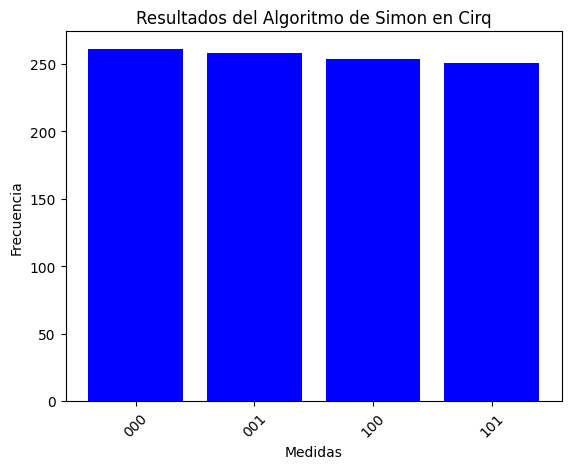

In [8]:
print("\nResultados de las mediciones:")
unique, counts = np.unique(counts, axis=0, return_counts=True)
counts_dict = {"".join(map(str, row)): count for row, count in zip(unique, counts)}
print(counts_dict)

print(f"\nEl valor secreto s encontrado es: {found_s}")


plt.bar(counts_dict.keys(), counts_dict.values(), color="blue")
plt.xlabel("Medidas")
plt.ylabel("Frecuencia")
plt.title("Resultados del Algoritmo de Simon en Cirq")
plt.xticks(rotation=45)
plt.show()